## IMPORTING DATA AND DOWNLOADING LIBRARIES

In [ ]:
# !pip install yfinance

In [26]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import seaborn as sb

## Getting and Importing of Data

In [28]:
ticker, start_date, end_date = "CVX", "2019-01-01", "2025-01-01"
df = yf.download(ticker, start=start_date, end=end_date)
df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1028\620502443.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CVX,CVX,CVX,CVX,CVX
Date,,,,,
2019-01-02,82.301796,83.037893,79.632505,79.810952,6384800
2019-01-03,80.725494,82.747908,80.353727,82.576893,6496200
2019-01-04,82.398415,82.524814,81.394645,81.996906,7952500
2019-01-07,83.469116,83.967283,81.729244,82.576872,5712700
2019-01-08,83.104797,84.606739,83.030445,84.316761,5674900


## Minor Data Wrangling

In [3]:
df = df.dropna()

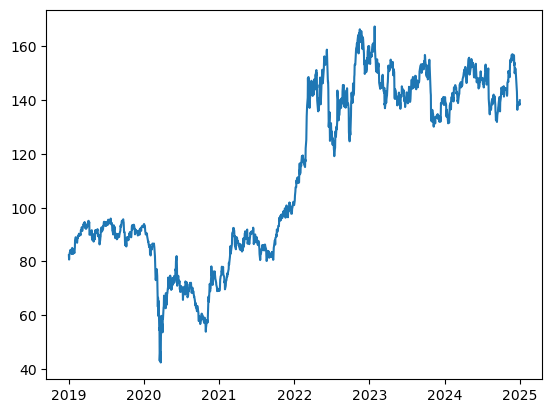

In [5]:
plt.plot(df.index, df['Close'], label = 'Close Price')

## Adding Moving Averages

In [45]:
df['21_day_ma'] = df['Close'].rolling(21).mean() 
df.head()

Price,Close,High,Low,Open,Volume,21_day_ma
Ticker,CVX,CVX,CVX,CVX,CVX,
Date,,,,,,
2019-01-02,82.301796,83.037893,79.632505,79.810952,6384800,NaN
2019-01-03,80.725494,82.747908,80.353727,82.576893,6496200,NaN
2019-01-04,82.398415,82.524814,81.394645,81.996906,7952500,NaN
2019-01-07,83.469116,83.967283,81.729244,82.576872,5712700,NaN
2019-01-08,83.104797,84.606739,83.030445,84.316761,5674900,NaN


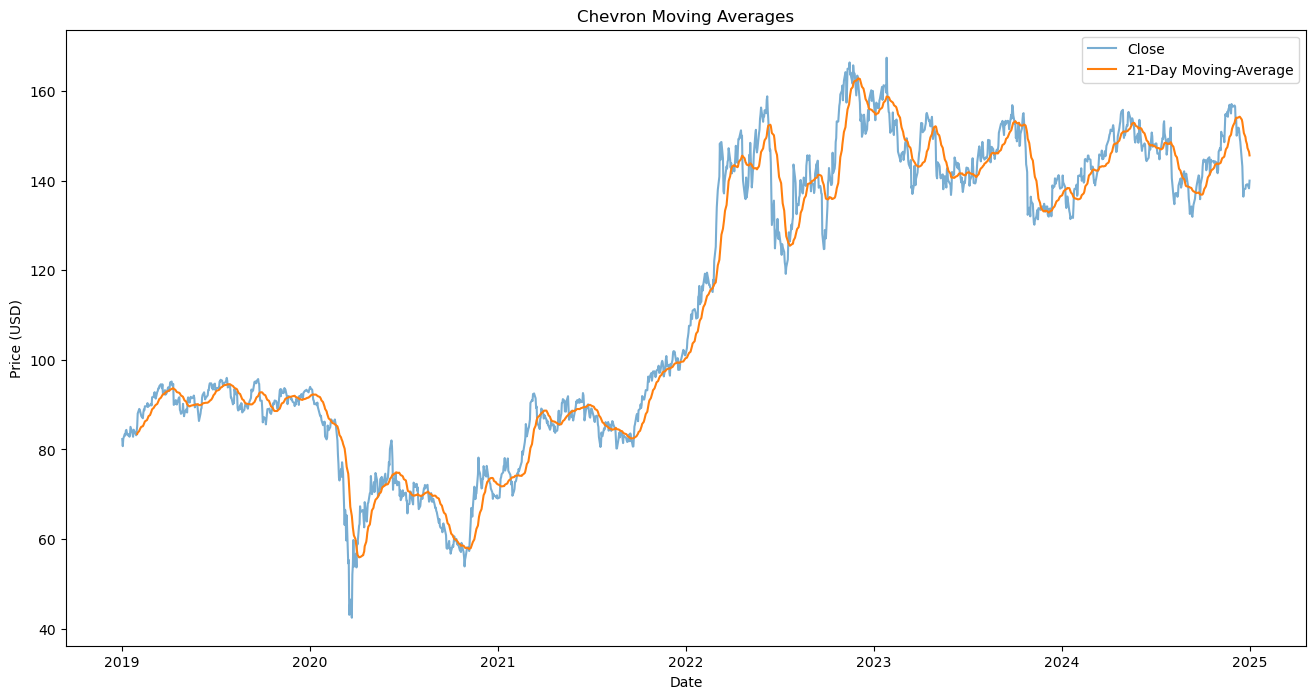

In [14]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close', alpha=0.6)
plt.plot(df['21_day_ma'], label='21-Day Moving-Average')
plt.title("Chevron Moving Averages")
plt.xlabel("Date"); plt.ylabel("Price (USD)")
plt.legend()
plt.show()

USING MOVING AVERAGE TO DETECT BULLISH AND BEARISH SIGNALS


In [22]:
df['Daily_Return'] = df['Close'].pct_change()

In [23]:
df['Daily_Return']

Date
2019-01-02         NaN
2019-01-03   -0.019153
2019-01-04    0.020724
2019-01-07    0.012994
2019-01-08   -0.004365
                ...   
2024-12-24    0.006085
2024-12-26    0.000973
2024-12-27    0.000139
2024-12-30   -0.006458
2024-12-31    0.012371
Name: Daily_Return, Length: 1510, dtype: float64

DONE TO CHECK THE DAILY RETURN OF THE INVESTMENT

In [24]:
df['Volatility'] = df['Daily_Return'].rolling(window=30).std()

In [25]:
df['Volatility']

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2024-12-24    0.013243
2024-12-26    0.013217
2024-12-27    0.012415
2024-12-30    0.011695
2024-12-31    0.012057
Name: Volatility, Length: 1510, dtype: float64

### THE VOLATLITY IS USED TO CREATE A STANDARD DEVIATION OF RETURNS A HIGHER VOLATILITY SIGNIFIES RISKY MARKET CONDITONS

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

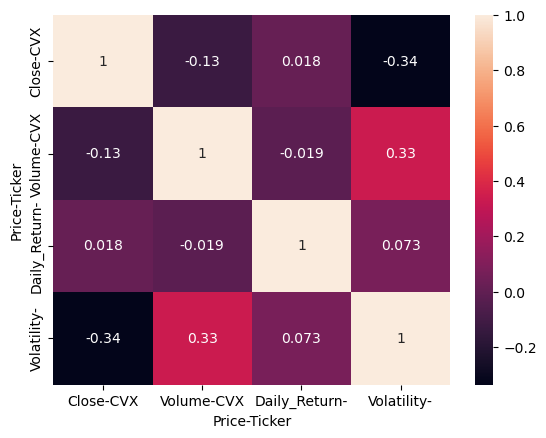

In [27]:
sb.heatmap(df[['Close','Volume','Daily_Return','Volatility']].corr(), annot=True)

## Anomaly Detection using Isolation Forest

In [20]:
# Feature selection
features = ['Close', 'High', 'Low', 'Open', 'Volume']
X = df[features]

# Isolation Forest Instanciation
Iso_forest_model = IsolationForest(contamination=0.02, random_state=42)

# fitting the model
Iso_forest_model.fit(X)

# Prediction/Detection
df['Iso_Anomaly'] = Iso_forest_model.predict(X)
Detected_Anomaly = df[df['Iso_Anomaly']== -1]

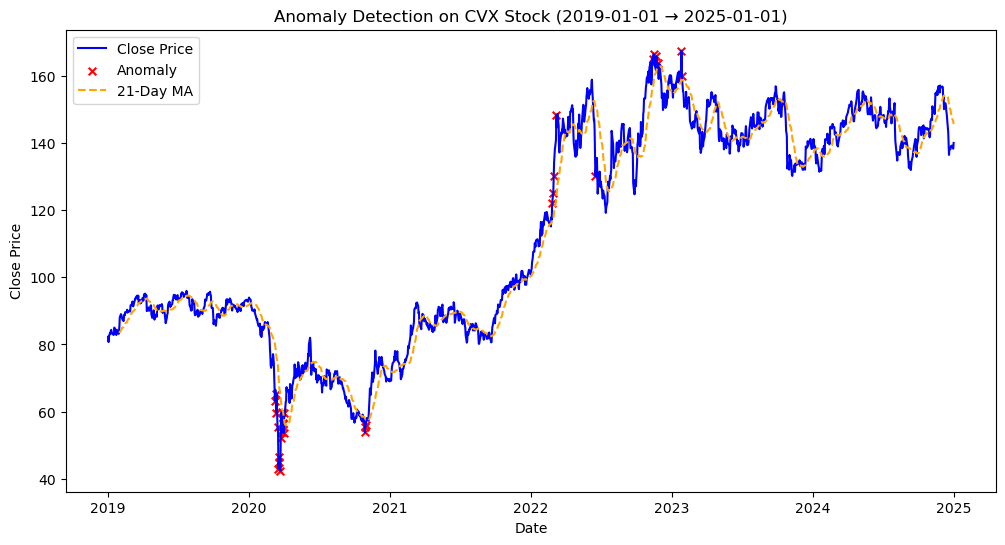

In [46]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Close Price", color="blue")
plt.scatter(Detected_Anomaly.index, Detected_Anomaly['Close'], color="red", marker="x", s=30, label="Anomaly")
plt.plot(df.index, df['21_day_ma'], label="21-Day MA", color="orange", linestyle="--")
plt.title(f"Anomaly Detection on {ticker} Stock ({start_date} → {end_date})")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()

    # Show chart + anomalies table + 21 Days Moving Averages
plt.show()

## Anomalies Detected

In [21]:
Detected_Anomaly

Price,Close,High,Low,Open,Volume,21_day_ma,Iso_Anomaly
Ticker,CVX,CVX,CVX,CVX,CVX,,
Date,,,,,,,
2020-03-09,63.147400,68.893057,62.622934,64.368551,30595500,80.170166,-1
2020-03-12,59.695309,61.159116,57.033833,60.454613,25768200,77.118855,-1
2020-03-13,65.300064,65.362688,58.012322,62.607282,23497500,76.100279,-1
2020-03-17,55.335186,57.127768,51.264692,55.108177,22684200,73.115997,-1
2020-03-18,43.092400,51.843957,42.716662,51.828298,24947300,71.058759,-1
2020-03-19,44.924126,45.785193,40.391790,43.256789,29871000,69.070108,-1
2020-03-20,46.489697,47.476009,44.117854,46.599286,26960400,67.190675,-1
2020-03-23,42.442692,46.497527,41.464209,45.605148,23764000,65.148348,-1
